In [1]:
from IPython.core.display import HTML
from IPython.lib.display import YouTubeVideo
from IPython.display import Image

def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Code in Python is 'commented out' when it is preceded by a hash sign. 
# Use comments to make your code more readable!

# A brief demo of k-means clustering
### Written by Reese Richardson for use in Biol Sci 378, Winter 2022, Northwestern University (rakr@u.northwestern.edu)

How does k-means clustering work? Let's find out! First, we'll install some packages we'll need.

In [3]:
# my favorite packages
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

# things we'll need for k-means specifically
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

The procedure for k-means is actually quite simple!

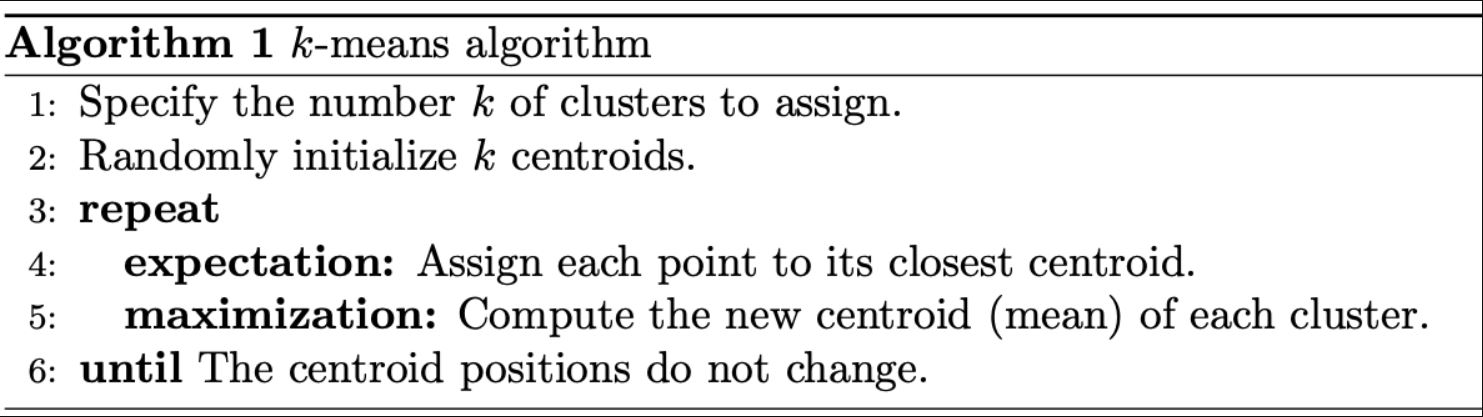

In [4]:
Image(filename='k_means_procedure.jpg')

Let's generate some synthetic data using the `make_blobs` utility.

In [5]:
features, true_labels = make_blobs(n_samples=200, # generate 200 data points
                                   n_features=2, # with 2 coordinates each
                                   centers=8, # around 8 true cluster centers
                                   cluster_std=2, # with a standard deviation of 2
                                   random_state=10) # random seed (try changing it)

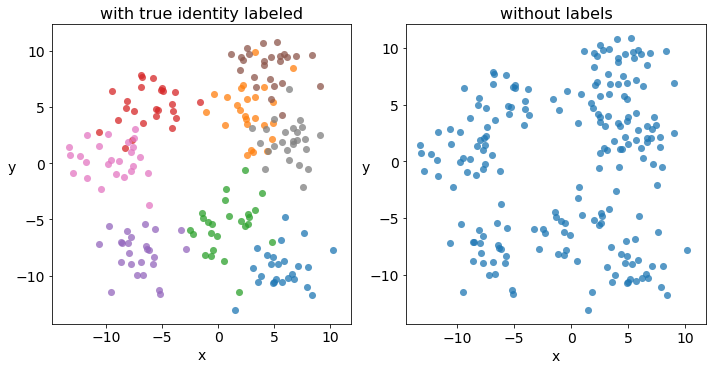

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[1].scatter(features[:,0], features[:,1], s=50, alpha=0.75, linewidth=0)

for label in np.unique(true_labels):
    axes[0].scatter(features[:,0][true_labels == label], 
                features[:,1][true_labels == label], 
                s=50, alpha=0.75, linewidth=0)
    

for ax in axes:
    ax.axis('square')
    ax.tick_params(labelsize=14)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14, rotation=0)
    
axes[1].set_title('without labels', fontsize=16)
axes[0].set_title('with true identity labeled', fontsize=16)
fig.tight_layout()

With the true cluster of origin of each point labeled, it is easy to see how the clusters relate. However, we often don't know the true underlying structure of the relationships between these points! Our view is normally more similar to that on the right plot above than on the left. Let's use `StandardScaler` to z-score normalize both our dimensions here.

In [7]:
scaler = StandardScaler() # instantiate StandardScaler
scaled_features = scaler.fit_transform(features) # get scaled features
scaled_features[0:5,] # show first five points

array([[-1.38714997,  0.64041561],
       [ 0.57395638,  1.2323376 ],
       [-0.05494347, -0.91552137],
       [ 0.62582949, -1.5905085 ],
       [-1.5218918 , -0.81365901]])

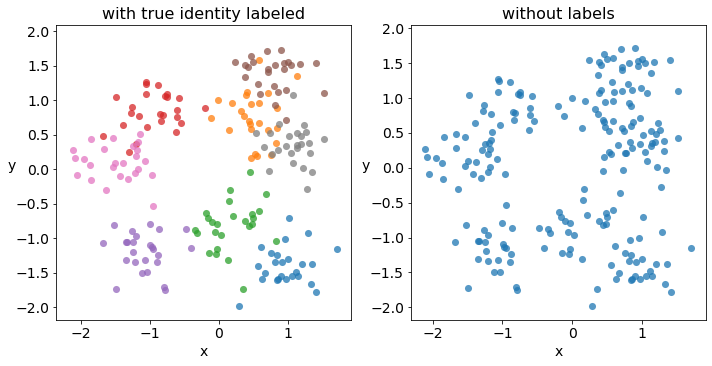

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[1].scatter(scaled_features[:,0], scaled_features[:,1], s=50, alpha=0.75, linewidth=0)

for label in np.unique(true_labels):
    axes[0].scatter(scaled_features[:,0][true_labels == label], 
                scaled_features[:,1][true_labels == label], 
                s=50, alpha=0.75, linewidth=0)
    

for ax in axes:
    ax.axis('square')
    ax.tick_params(labelsize=14)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14, rotation=0)
    
axes[1].set_title('without labels', fontsize=16)
axes[0].set_title('with true identity labeled', fontsize=16)
fig.tight_layout()

This weights all dimensions (for us, just x and y) of our dataset equally so that no dimensions contributes more to our error function than any other. Next, we will instantiate an Object of `KMeans`.

In [9]:
k = 8
kmeans = KMeans(init="random", # instantiate KMeans
                n_clusters=k, # what k to use (k clusters)
                n_init=1, # number of times to initiate (you can initate multiple times to find a more optimal solution)
                max_iter=25, # number of iterations of expectation/maximization cycle to run through
                tol=0, # you can end cycling of expectation/maximization early if you meet a certain tolerance threshold
                # this is called "declaring convergence"
                # we will set this tolerance threshold to zero so that we go through every iteration.
                random_state=42) # random seed

Now we use this instance of `kmean` to peform clustering.

In [10]:
kmeans.fit(scaled_features) # perform k-means clustering
print('Locations of cluster centers: ')
print(kmeans.cluster_centers_)
print('\nCluster identities of each point at the end of iterations (predicted labels): ')
print(kmeans.labels_)
print('\nSum of square errors (SSE; sum of the squares of distances of each point to its cluster centriod): ')
print(kmeans.inertia_)

Locations of cluster centers: 
[[ 0.88174032  0.34342281]
 [-1.13069663 -1.18235574]
 [-0.84588071  0.88666977]
 [-1.49815834  0.1532373 ]
 [ 0.70091279  1.28236677]
 [ 0.05518122 -0.83827839]
 [ 0.76828352 -1.38160726]
 [ 1.29137041 -1.42733335]]

Cluster identities of each point at the end of iterations (predicted labels): 
[3 4 5 6 1 0 0 6 4 2 1 5 5 0 4 2 0 4 2 0 6 1 0 2 4 0 1 0 4 0 0 2 4 2 6 0 3
 4 3 0 6 4 4 4 5 7 3 0 0 2 0 6 5 4 7 3 1 4 6 4 2 0 3 7 1 4 5 1 2 4 6 0 4 0
 5 6 1 6 5 0 3 1 5 3 4 6 1 1 5 5 5 0 0 4 4 1 4 0 3 1 3 2 2 0 3 2 4 3 4 6 5
 0 5 5 3 0 7 3 0 3 4 1 0 1 0 5 3 6 3 4 2 4 5 6 2 3 7 3 1 4 3 4 5 7 1 2 1 6
 0 1 2 5 5 3 0 0 0 0 1 3 7 3 1 4 0 6 3 4 0 0 7 4 7 0 3 3 4 5 2 4 0 4 6 4 5
 2 2 2 5 1 1 2 1 2 0 6 2 3 4 4]

Sum of square errors (SSE; sum of the squares of distances of each point to its cluster centriod): 
31.487763389846027


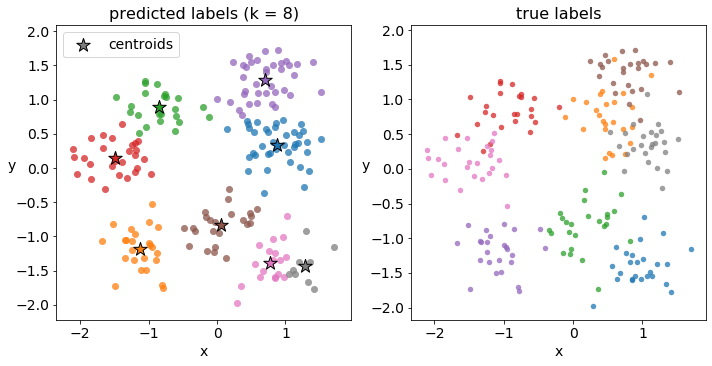

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for label in np.unique(kmeans.labels_):
    axes[0].scatter(scaled_features[:,0][kmeans.labels_ == label], 
                scaled_features[:,1][kmeans.labels_ == label], 
                s=50, alpha=0.75, linewidth=0, color=sns.color_palette()[label])
    axes[0].scatter(*kmeans.cluster_centers_[label], 
                    color=sns.color_palette()[label], 
                    marker='*', s=200, linewidth=1, edgecolor='k')

for label in np.unique(true_labels):
    axes[1].scatter(scaled_features[:,0][true_labels == label], 
                scaled_features[:,1][true_labels == label], 
                s=30, alpha=0.75, linewidth=0, color=sns.color_palette()[label])

axes[0].scatter([], [], color=sns.color_palette()[label], marker='*', 
                s=200, linewidth=1, edgecolor='k', label='centroids')
axes[0].legend(fontsize=14)

for ax in axes:
    ax.axis('square')
    ax.tick_params(labelsize=14)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14, rotation=0)
    
axes[0].set_title('predicted labels (k = ' + str(k) + ')', fontsize=16)
axes[1].set_title('true labels', fontsize=16)
fig.tight_layout()

Let's visualize how the SSE changes with each successive iteration,up to 50 for this toy dataset.

In [12]:
n_iter = 50
k = 8
sse_array = []
for n in range(1,n_iter+1):
    kmeans = KMeans(init="random", # instantiate KMeans
                    n_clusters=k, # with k = 5 (5 clusters)
                    n_init=1, # number of times to initiate (you can initate multiple times to find a more optimal solution)
                    max_iter=n, # number of iterations of expectation/maximization cycle to run through
                    tol=0, # you can end cycling of expectation/maximization early if you meet a certain tolerance threshold
                    # this is called "declaring convergence"
                    # we will set this tolerance threshold to zero so that we go through every iteration.
                    random_state=42) # random seed
    kmeans.fit(scaled_features)
    sse_array.append(kmeans.inertia_)
sse_array = np.array(sse_array)

Text(0, 0.5, 'SSE')

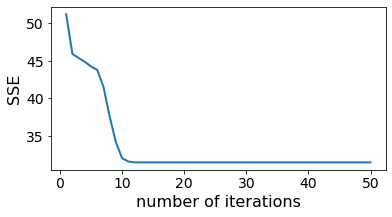

In [13]:
fig = plt.figure(figsize=(6,3))
plt.plot(range(1,n_iter+1),sse_array, linewidth=2)

ax = plt.gca()
ax.tick_params(labelsize=14)
ax.set_xlabel('number of iterations', fontsize=16)
ax.set_ylabel('SSE', fontsize=16, rotation=90)

As you can see, SSE approaches its minimum value quite quickly. You can actually set the parameter `tol` to a nonzero value if you would like to stop after the difference between the previous iteration's SSE and this iteration's SSE falls below a particular threshold. Default `tol = 1e-4`.

Now for the big question: if you don't know the underlying cluster structure of your data...
## ... how do you know which value of *k* to select?

Let's see what the SSE value converges to after 50 iterations with multiple values of `k`.

In [14]:
n_iter = 50
k_range = np.arange(2,31)
sse_array = []
for k in k_range:
    kmeans = KMeans(init="random", # instantiate KMeans
                    n_clusters=k, # with k = 5 (5 clusters)
                    n_init=1, # number of times to initiate (you can initate multiple times to find a more optimal solution)
                    max_iter=n_iter, # number of iterations of expectation/maximization cycle to run through
                    tol=0, # you can end cycling of expectation/maximization early if you meet a certain tolerance threshold
                    # this is called "declaring convergence"
                    # we will set this tolerance threshold to zero so that we go through every iteration.
                    random_state=42) # random seed
    kmeans.fit(scaled_features)
    sse_array.append(kmeans.inertia_)
sse_array = np.array(sse_array)

Text(0, 0.5, 'SSE')

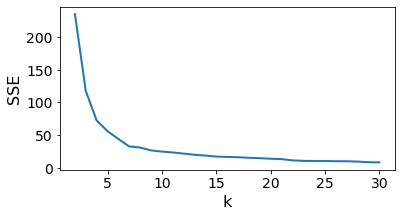

In [15]:
fig = plt.figure(figsize=(6,3))
plt.plot(k_range,sse_array, linewidth=2)

ax = plt.gca()
ax.tick_params(labelsize=14)
ax.set_xlabel('k', fontsize=16)
ax.set_ylabel('SSE', fontsize=16, rotation=90)

As `k` increases, our SSE first goes down by a lot with each successive `k`, then by a little. This makes sense, since having more clusters means each data point will naturally be closer to its cluster centroid. To find an optimal value of `k`, many data scientists will select where the "knee" of this curve. This is the location where adding an additional cluster provides little additional marginal benefit for SSE. 

There isn't a solid quantitative definition of where this is, and the knee location can change drastically depending on which definition you choose. Thus I'm not very fond of using this method and would never use in a real-world application. However, if you were to compel me, under great duress, to select a knee on this graph, I would probably put it here:

Text(0, 0.5, 'SSE')

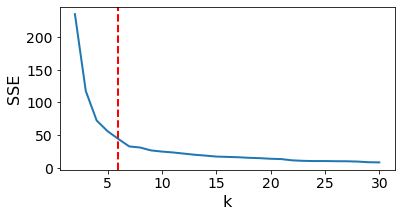

In [16]:
fig = plt.figure(figsize=(6,3))
plt.plot(k_range,sse_array, linewidth=2)
plt.axvline(6, linewidth=2, color='r', linestyle='dashed')

ax = plt.gca()
ax.tick_params(labelsize=14)
ax.set_xlabel('k', fontsize=16)
ax.set_ylabel('SSE', fontsize=16, rotation=90)

Why at `k = 6`? I don't know. Why are you forcing me to do this? That's real weird of you, not gonna lie.

If you are looking for a more quantitative approach, you might select the value of `k` that maximizes the [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)), a metric that compares distances between points within a cluster to distances between points between clusters.

In [17]:
n_iter = 50
k_range = np.arange(2,31)
silhouette_array = []
for k in k_range:
    kmeans = KMeans(init="random", # instantiate KMeans
                    n_clusters=k, # with k = 5 (5 clusters)
                    n_init=1, # number of times to initiate (you can initate multiple times to find a more optimal solution)
                    max_iter=n_iter, # number of iterations of expectation/maximization cycle to run through
                    tol=0, # you can end cycling of expectation/maximization early if you meet a certain tolerance threshold
                    # this is called "declaring convergence"
                    # we will set this tolerance threshold to zero so that we go through every iteration.
                    random_state=42) # random seed
    kmeans.fit(scaled_features)
    silhouette_array.append(silhouette_score(scaled_features, kmeans.labels_))
silhouette_array = np.array(silhouette_array)

Text(0, 0.5, 'silhouette coefficient')

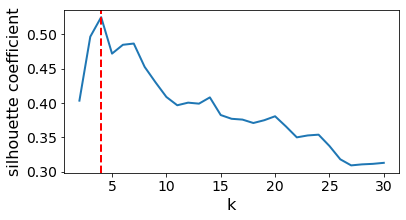

In [18]:
fig = plt.figure(figsize=(6,3))
plt.plot(k_range,silhouette_array, linewidth=2)
plt.axvline(k_range[np.argmax(silhouette_array)], linewidth=2, color='r', linestyle='dashed')

ax = plt.gca()
ax.tick_params(labelsize=14)
ax.set_xlabel('k', fontsize=16)
ax.set_ylabel('silhouette coefficient', fontsize=16, rotation=90)

This returns `k = 4` for this data. Let's cluster one last time with this `k` and set a nonzero value for `tol` so that we end iterating once we have found a pretty good solution.

actual number of iterations used: 10


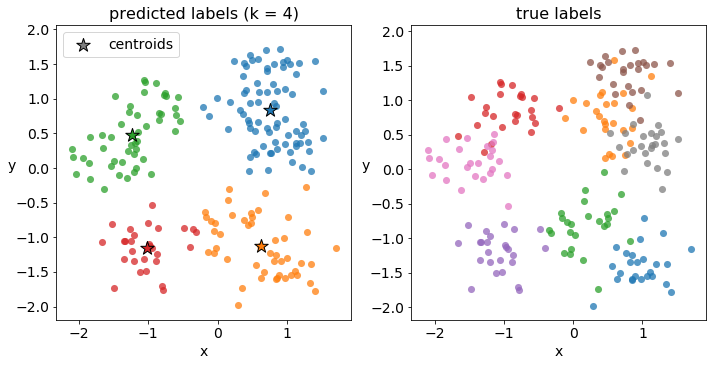

In [19]:
k = 4
kmeans = KMeans(init="random", # instantiate KMeans
                n_clusters=k, # what k to use (k clusters)
                n_init=1, # number of times to initiate (you can initate multiple times to find a more optimal solution)
                max_iter=300, # maximum number of iterations of expectation/maximization cycle to run through
                tol=1e-4, # you can end cycling of expectation/maximization early if you meet a certain tolerance threshold
                    # this is called "declaring convergence"
                random_state=42) # random seed
kmeans.fit(scaled_features)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for label in np.unique(kmeans.labels_):
    axes[0].scatter(scaled_features[:,0][kmeans.labels_ == label], 
                scaled_features[:,1][kmeans.labels_ == label], 
                s=50, alpha=0.75, linewidth=0, color=sns.color_palette()[label])
    axes[0].scatter(*kmeans.cluster_centers_[label], 
                    color=sns.color_palette()[label], 
                    marker='*', s=200, linewidth=1, edgecolor='k')

for label in np.unique(true_labels):
    axes[1].scatter(scaled_features[:,0][true_labels == label], 
                scaled_features[:,1][true_labels == label], 
                s=50, alpha=0.75, linewidth=0, color=sns.color_palette()[label])

axes[0].scatter([], [], color=sns.color_palette()[label], marker='*', 
                s=200, linewidth=1, edgecolor='k', label='centroids')
axes[0].legend(fontsize=14)

for ax in axes:
    ax.axis('square')
    ax.tick_params(labelsize=14)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14, rotation=0)
    
axes[0].set_title('predicted labels (k = ' + str(k) + ')', fontsize=16)
axes[1].set_title('true labels', fontsize=16)
fig.tight_layout()
print('actual number of iterations used: ' + str(kmeans.n_iter_))

Does `k = 4` accurately describe the cluster structure from which this data was generated? No, but when you use k-means clustering in genomics, this underlying structure is often unknowable. We really on methods like k-means and hierarchical clustering to make "good enough" approximations.

Try playing around with the parameters in this notebook to see how clustering changes!